In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v -p matplotlib

Sebastian Raschka 10/03/2015 

CPython 3.4.2
IPython 3.0.0

matplotlib 1.4.2


In [2]:
import sys
sys.path = ['/Users/sebastian/github/mlxtend'] + sys.path

import mlxtend
mlxtend.__version__

'0.2.2'

# Plotting Decision Regions

<br>
<br>

## Single Plot

In [3]:
%matplotlib inline

### 2D Data

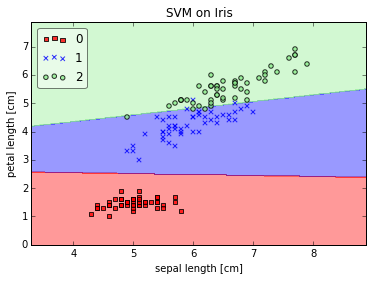

In [4]:
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X,y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, res=0.02, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

### 1D Data

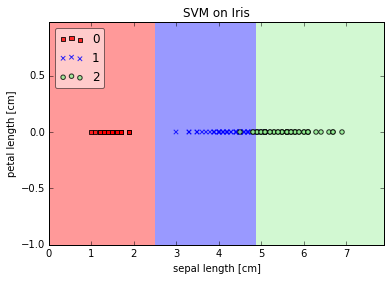

In [5]:
#from mlxtend.matplotlib import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2]
X = X[:, None]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X,y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, res=0.02, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

<br>
<br>

## Subplots

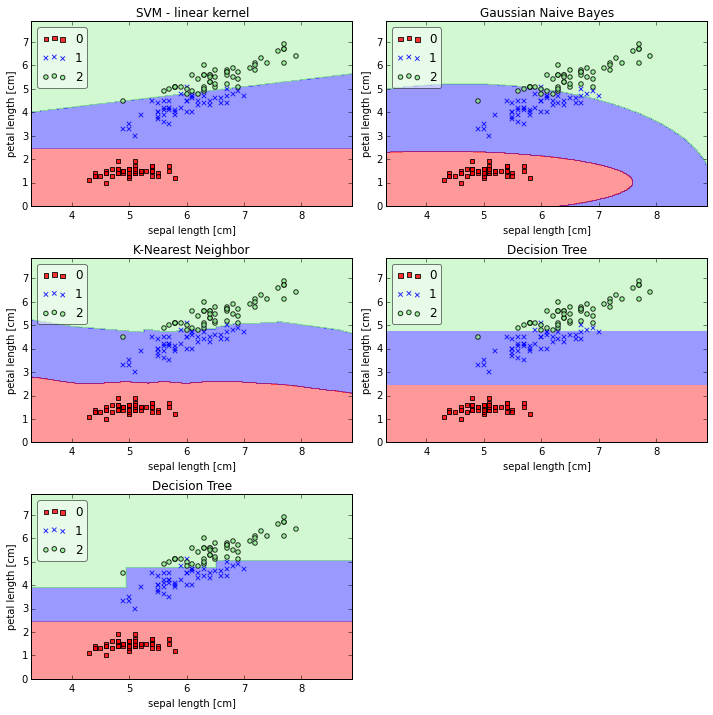

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target


# Fit classifiers
gnb = GaussianNB().fit(X, y)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform').fit(X, y)

lin_svm = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False).fit(X, y)

tree = DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best').fit(X, y)

tree2 = DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best').fit(X, y)


### Plotting

fig = plt.figure(figsize=(10,10))

titles = ['SVM - linear kernel',
          'Gaussian Naive Bayes',
          'K-Nearest Neighbor',
          'Decision Tree',
          'Decision Tree']


for i, clf in enumerate((lin_svm, gnb, knn, tree, tree2)):
    
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, res=0.02, legend=2)
    
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(titles[i])

plt.tight_layout()
plt.show()